In [32]:
%run headers.ipynb
%run dataset2.ipynb
%run unet_plots.ipynb
%run loss.ipynb

#### Load Data :

In [2]:
LoadData_Info_with_print()

Information about the dataset : 


Total images : 780
437
210
133

Total masked : 780
437
210
133



In [3]:
# LoadData_Info_without_normal_print()

In [4]:
X_train, X_valid, X_test, y_train, y_valid, y_test = UNet_dataset_with_valid(0.7,0.1,0.2)
X_train/=255
X_valid/=255
X_test/=255
y_train/=255
y_valid/=255
y_test/=255

In [5]:
print(len(X_train),len(X_valid),len(X_test),len(y_train),len(y_valid),len(y_test))

545 154 81 545 154 81


#### Sample Plot:

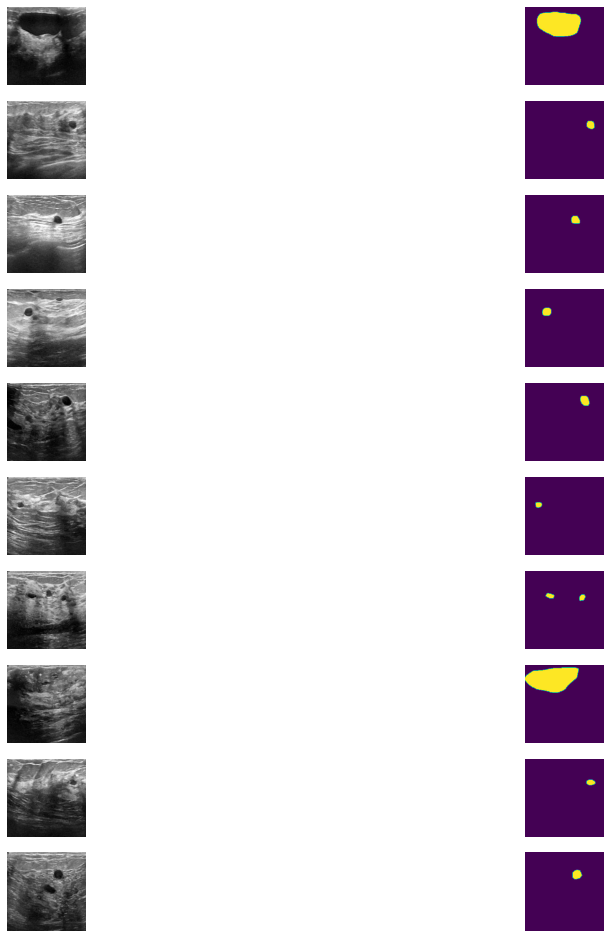

In [6]:
x=65
plot_sample(data[0][0],data[0][1],[],x,x+10)

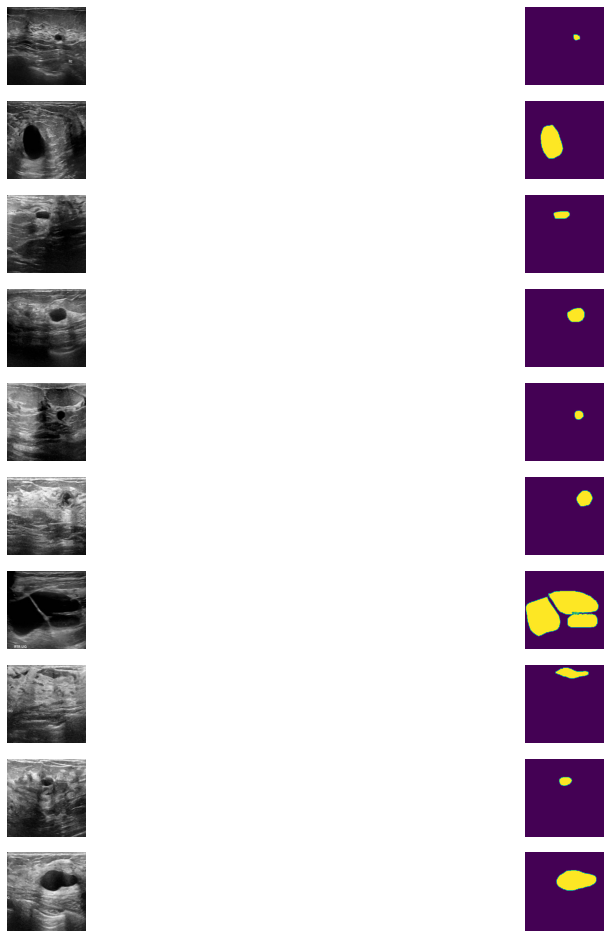

In [7]:
x=100
plot_sample(data[0][0],data[0][1],[],x,x+10)

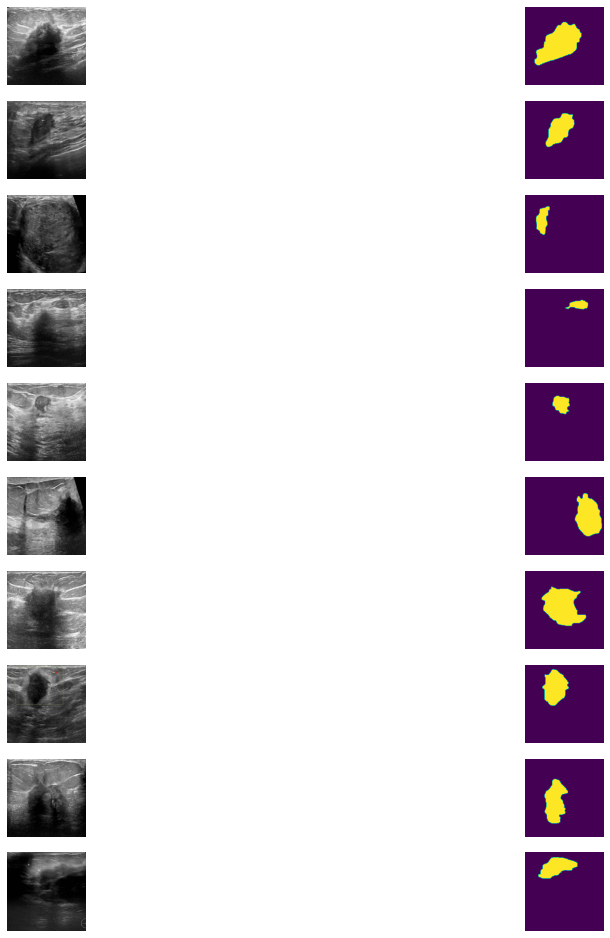

In [8]:
plot_sample(data[1][0],data[1][1],[],x,x+10)

## Unet Construction:

In [9]:
%run unet_architecture_1.ipynb

In [10]:
input_shape = (256, 256, 3)
unet_model = unet_build(input_shape)
unet_model.summary()

1
2
3
4
Model: "U-Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________

In [222]:
input_shape = (256, 256, 3)
a_unet_model = attention_unet_build(input_shape)

9
10
11
12


In [12]:
# %%html
# <img src="https://i.ibb.co/gPzyV5P/download.png" />

In [13]:
unet_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=[DiceAccuracy])

In [14]:
now = time.time()
mlsec  = repr(now).split('.')[1][:3]
# f_name = time.strftime("%Y-%m-%d %H.%M.%S.{}".format(mlsec), time.localtime(now))
f_name = ""
filepath=r'C:\Users\laksa\OneDrive\Desktop\cnn\callbacks'+'\\'+f_name
filepath+='_BCE-1e-3-x0_new.hdf5'
filepath

'C:\\Users\\laksa\\OneDrive\\Desktop\\cnn\\callbacks\\_BCE-1e-3-x0_new.hdf5'

In [15]:
checkpoint              = ModelCheckpoint(filepath=filepath, monitor='val_DiceAccuracy',mode='max',verbose=1,save_best_only=True)
callbacks = [checkpoint]
history = unet_model.fit(X_train,y_train,batch_size=25,epochs=300,validation_data=(X_valid,y_valid),callbacks=callbacks)

Epoch 1/300
22/22 [==============================] - 28s 824ms/step - loss: 0.3679 - DiceAccuracy: 0.1376 - val_loss: 0.4580 - val_DiceAccuracy: 0.1060

Epoch 00001: val_DiceAccuracy improved from -inf to 0.10600, saving model to C:\Users\laksa\OneDrive\Desktop\cnn\callbacks\_BCE-1e-3-x0_new.hdf5
Epoch 2/300
22/22 [==============================] - 12s 533ms/step - loss: 0.2725 - DiceAccuracy: 0.2138 - val_loss: 10.1330 - val_DiceAccuracy: 0.1342

Epoch 00002: val_DiceAccuracy improved from 0.10600 to 0.13420, saving model to C:\Users\laksa\OneDrive\Desktop\cnn\callbacks\_BCE-1e-3-x0_new.hdf5
Epoch 3/300
22/22 [==============================] - 12s 530ms/step - loss: 0.2227 - DiceAccuracy: 0.3005 - val_loss: 8.5539 - val_DiceAccuracy: 0.1374

Epoch 00003: val_DiceAccuracy improved from 0.13420 to 0.13742, saving model to C:\Users\laksa\OneDrive\Desktop\cnn\callbacks\_BCE-1e-3-x0_new.hdf5
Epoch 4/300
22/22 [==============================] - 12s 531ms/step - loss: 0.1988 - DiceAccuracy: 

Epoch 32/300
22/22 [==============================] - 12s 535ms/step - loss: 0.0471 - DiceAccuracy: 0.8117 - val_loss: 0.1497 - val_DiceAccuracy: 0.6142

Epoch 00032: val_DiceAccuracy did not improve from 0.62511
Epoch 33/300
22/22 [==============================] - 12s 534ms/step - loss: 0.0485 - DiceAccuracy: 0.8158 - val_loss: 0.1457 - val_DiceAccuracy: 0.6215

Epoch 00033: val_DiceAccuracy did not improve from 0.62511
Epoch 34/300
22/22 [==============================] - 12s 542ms/step - loss: 0.0494 - DiceAccuracy: 0.8066 - val_loss: 0.1465 - val_DiceAccuracy: 0.6177

Epoch 00034: val_DiceAccuracy did not improve from 0.62511
Epoch 35/300
22/22 [==============================] - 12s 532ms/step - loss: 0.0491 - DiceAccuracy: 0.8140 - val_loss: 0.1488 - val_DiceAccuracy: 0.6377

Epoch 00035: val_DiceAccuracy improved from 0.62511 to 0.63770, saving model to C:\Users\laksa\OneDrive\Desktop\cnn\callbacks\_BCE-1e-3-x0_new.hdf5
Epoch 36/300
22/22 [==============================] - 12s 5

22/22 [==============================] - 12s 529ms/step - loss: 0.0227 - DiceAccuracy: 0.9082 - val_loss: 0.1671 - val_DiceAccuracy: 0.6688

Epoch 00068: val_DiceAccuracy did not improve from 0.68962
Epoch 69/300
22/22 [==============================] - 12s 528ms/step - loss: 0.0206 - DiceAccuracy: 0.9194 - val_loss: 0.1740 - val_DiceAccuracy: 0.6732

Epoch 00069: val_DiceAccuracy did not improve from 0.68962
Epoch 70/300
22/22 [==============================] - 12s 528ms/step - loss: 0.0210 - DiceAccuracy: 0.9184 - val_loss: 0.1650 - val_DiceAccuracy: 0.6806

Epoch 00070: val_DiceAccuracy did not improve from 0.68962
Epoch 71/300
22/22 [==============================] - 12s 527ms/step - loss: 0.0197 - DiceAccuracy: 0.9219 - val_loss: 0.1602 - val_DiceAccuracy: 0.6791

Epoch 00071: val_DiceAccuracy did not improve from 0.68962
Epoch 72/300
22/22 [==============================] - 12s 528ms/step - loss: 0.0209 - DiceAccuracy: 0.9195 - val_loss: 0.1471 - val_DiceAccuracy: 0.6959

Epoch 0

22/22 [==============================] - 12s 533ms/step - loss: 0.0208 - DiceAccuracy: 0.9205 - val_loss: 0.2400 - val_DiceAccuracy: 0.6437

Epoch 00104: val_DiceAccuracy did not improve from 0.70520
Epoch 105/300
22/22 [==============================] - 12s 532ms/step - loss: 0.0167 - DiceAccuracy: 0.9350 - val_loss: 0.1763 - val_DiceAccuracy: 0.6980

Epoch 00105: val_DiceAccuracy did not improve from 0.70520
Epoch 106/300
22/22 [==============================] - 12s 528ms/step - loss: 0.0159 - DiceAccuracy: 0.9363 - val_loss: 0.1872 - val_DiceAccuracy: 0.6854

Epoch 00106: val_DiceAccuracy did not improve from 0.70520
Epoch 107/300
22/22 [==============================] - 12s 529ms/step - loss: 0.0148 - DiceAccuracy: 0.9419 - val_loss: 0.1874 - val_DiceAccuracy: 0.6906

Epoch 00107: val_DiceAccuracy did not improve from 0.70520
Epoch 108/300
22/22 [==============================] - 12s 528ms/step - loss: 0.0141 - DiceAccuracy: 0.9434 - val_loss: 0.1797 - val_DiceAccuracy: 0.6941

Epo


Epoch 00141: val_DiceAccuracy did not improve from 0.71042
Epoch 142/300
22/22 [==============================] - 12s 528ms/step - loss: 0.0095 - DiceAccuracy: 0.9634 - val_loss: 0.2073 - val_DiceAccuracy: 0.7012

Epoch 00142: val_DiceAccuracy did not improve from 0.71042
Epoch 143/300
22/22 [==============================] - 12s 529ms/step - loss: 0.0087 - DiceAccuracy: 0.9658 - val_loss: 0.2024 - val_DiceAccuracy: 0.7047

Epoch 00143: val_DiceAccuracy did not improve from 0.71042
Epoch 144/300
22/22 [==============================] - 12s 527ms/step - loss: 0.0084 - DiceAccuracy: 0.9680 - val_loss: 0.2057 - val_DiceAccuracy: 0.7016

Epoch 00144: val_DiceAccuracy did not improve from 0.71042
Epoch 145/300
22/22 [==============================] - 12s 527ms/step - loss: 0.0085 - DiceAccuracy: 0.9675 - val_loss: 0.2115 - val_DiceAccuracy: 0.6940

Epoch 00145: val_DiceAccuracy did not improve from 0.71042
Epoch 146/300
22/22 [==============================] - 12s 530ms/step - loss: 0.0087

22/22 [==============================] - 12s 528ms/step - loss: 0.0097 - DiceAccuracy: 0.9615 - val_loss: 0.1863 - val_DiceAccuracy: 0.6959

Epoch 00180: val_DiceAccuracy did not improve from 0.71042
Epoch 181/300
22/22 [==============================] - 12s 535ms/step - loss: 0.0089 - DiceAccuracy: 0.9661 - val_loss: 0.1921 - val_DiceAccuracy: 0.6963

Epoch 00181: val_DiceAccuracy did not improve from 0.71042
Epoch 182/300
22/22 [==============================] - 12s 530ms/step - loss: 0.0088 - DiceAccuracy: 0.9655 - val_loss: 0.1877 - val_DiceAccuracy: 0.6961

Epoch 00182: val_DiceAccuracy did not improve from 0.71042
Epoch 183/300
22/22 [==============================] - 12s 531ms/step - loss: 0.0089 - DiceAccuracy: 0.9655 - val_loss: 0.1995 - val_DiceAccuracy: 0.6895

Epoch 00183: val_DiceAccuracy did not improve from 0.71042
Epoch 184/300
22/22 [==============================] - 12s 531ms/step - loss: 0.0086 - DiceAccuracy: 0.9681 - val_loss: 0.2054 - val_DiceAccuracy: 0.6829

Epo

22/22 [==============================] - 12s 536ms/step - loss: 0.0064 - DiceAccuracy: 0.9761 - val_loss: 0.2499 - val_DiceAccuracy: 0.7005

Epoch 00218: val_DiceAccuracy did not improve from 0.71042
Epoch 219/300
22/22 [==============================] - 12s 533ms/step - loss: 0.0065 - DiceAccuracy: 0.9769 - val_loss: 0.2492 - val_DiceAccuracy: 0.6934

Epoch 00219: val_DiceAccuracy did not improve from 0.71042
Epoch 220/300
22/22 [==============================] - 12s 529ms/step - loss: 0.0063 - DiceAccuracy: 0.9772 - val_loss: 0.2423 - val_DiceAccuracy: 0.7022

Epoch 00220: val_DiceAccuracy did not improve from 0.71042
Epoch 221/300
22/22 [==============================] - 12s 534ms/step - loss: 0.0061 - DiceAccuracy: 0.9771 - val_loss: 0.2505 - val_DiceAccuracy: 0.6902

Epoch 00221: val_DiceAccuracy did not improve from 0.71042
Epoch 222/300
22/22 [==============================] - 12s 533ms/step - loss: 0.0068 - DiceAccuracy: 0.9760 - val_loss: 0.2510 - val_DiceAccuracy: 0.6816

Epo

22/22 [==============================] - 12s 532ms/step - loss: 0.0061 - DiceAccuracy: 0.9774 - val_loss: 0.2324 - val_DiceAccuracy: 0.6904

Epoch 00256: val_DiceAccuracy did not improve from 0.71042
Epoch 257/300
22/22 [==============================] - 12s 531ms/step - loss: 0.0061 - DiceAccuracy: 0.9781 - val_loss: 0.2347 - val_DiceAccuracy: 0.6894

Epoch 00257: val_DiceAccuracy did not improve from 0.71042
Epoch 258/300
22/22 [==============================] - 12s 531ms/step - loss: 0.0061 - DiceAccuracy: 0.9774 - val_loss: 0.2362 - val_DiceAccuracy: 0.6971

Epoch 00258: val_DiceAccuracy did not improve from 0.71042
Epoch 259/300
22/22 [==============================] - 12s 530ms/step - loss: 0.0059 - DiceAccuracy: 0.9779 - val_loss: 0.2312 - val_DiceAccuracy: 0.7013

Epoch 00259: val_DiceAccuracy did not improve from 0.71042
Epoch 260/300
22/22 [==============================] - 12s 531ms/step - loss: 0.0058 - DiceAccuracy: 0.9788 - val_loss: 0.2385 - val_DiceAccuracy: 0.6952

Epo

22/22 [==============================] - 12s 530ms/step - loss: 0.0050 - DiceAccuracy: 0.9819 - val_loss: 0.2519 - val_DiceAccuracy: 0.7032

Epoch 00294: val_DiceAccuracy did not improve from 0.71042
Epoch 295/300
22/22 [==============================] - 12s 533ms/step - loss: 0.0051 - DiceAccuracy: 0.9819 - val_loss: 0.2563 - val_DiceAccuracy: 0.6963

Epoch 00295: val_DiceAccuracy did not improve from 0.71042
Epoch 296/300
22/22 [==============================] - 12s 530ms/step - loss: 0.0050 - DiceAccuracy: 0.9821 - val_loss: 0.2574 - val_DiceAccuracy: 0.7019

Epoch 00296: val_DiceAccuracy did not improve from 0.71042
Epoch 297/300
22/22 [==============================] - 12s 530ms/step - loss: 0.0049 - DiceAccuracy: 0.9823 - val_loss: 0.2576 - val_DiceAccuracy: 0.7009

Epoch 00297: val_DiceAccuracy did not improve from 0.71042
Epoch 298/300
22/22 [==============================] - 12s 531ms/step - loss: 0.0049 - DiceAccuracy: 0.9823 - val_loss: 0.2600 - val_DiceAccuracy: 0.7039

Epo

In [213]:
%run unet_plots.ipynb

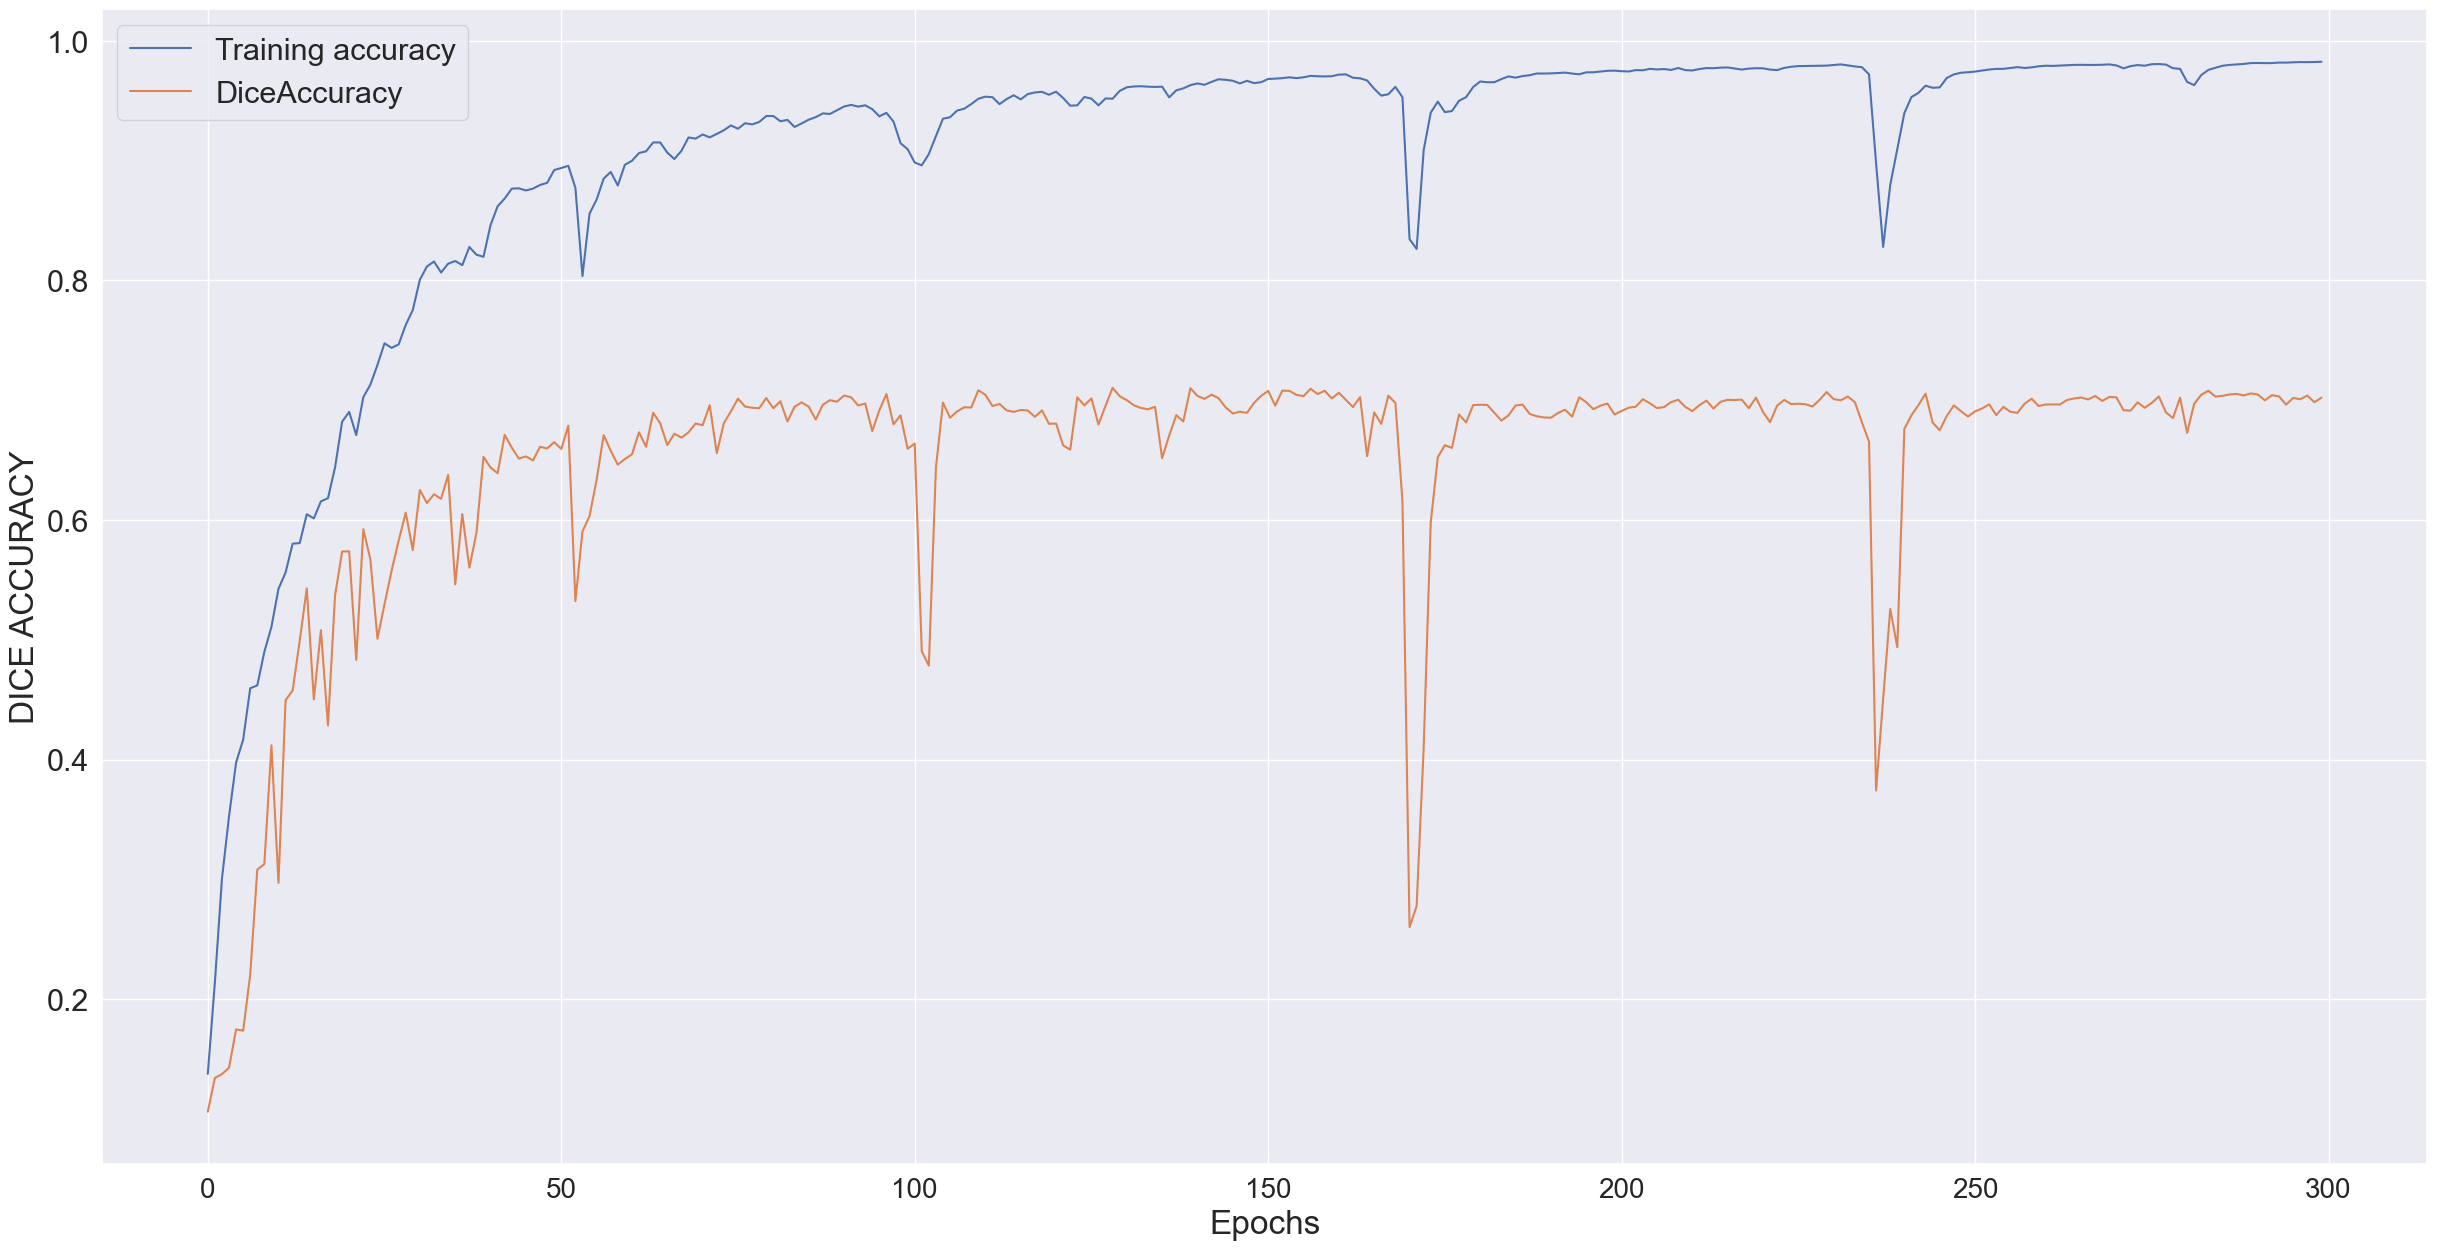

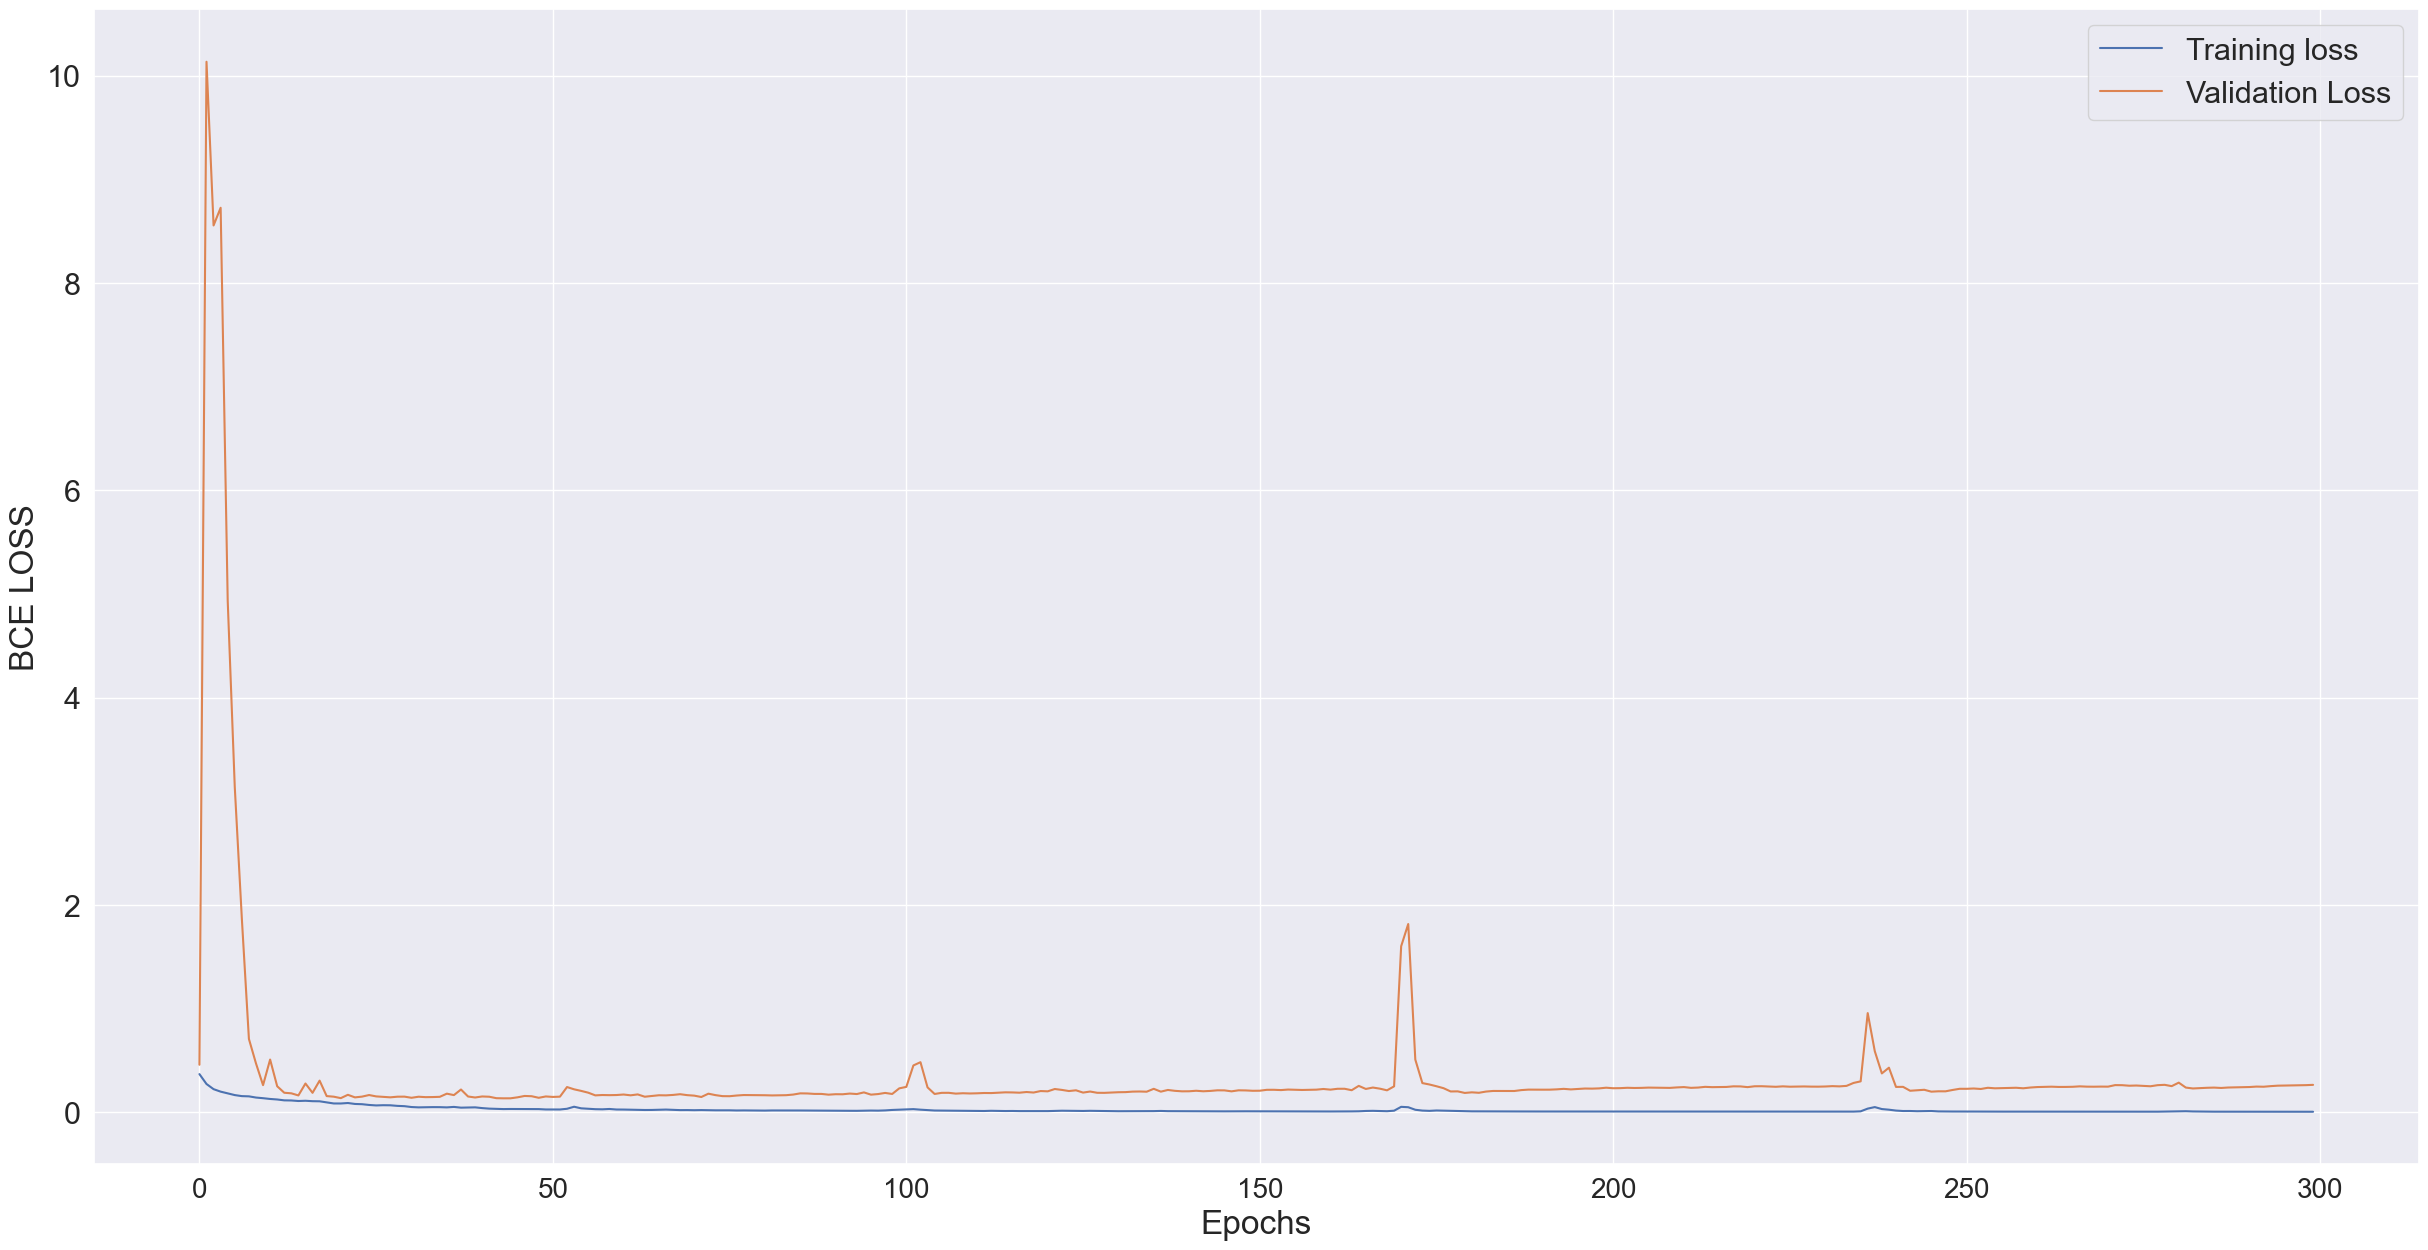

In [220]:
plot_train_val_acc_(history)
plot_train_val_loss_(history)

In [53]:
model_best = load_model(filepath,custom_objects={'DiceBCELoss':DiceBCELoss,'BCE_loss':DiceAccuracy,'DiceAccuracy':dice_coef})

In [55]:
pred=model_best.predict(X_test)

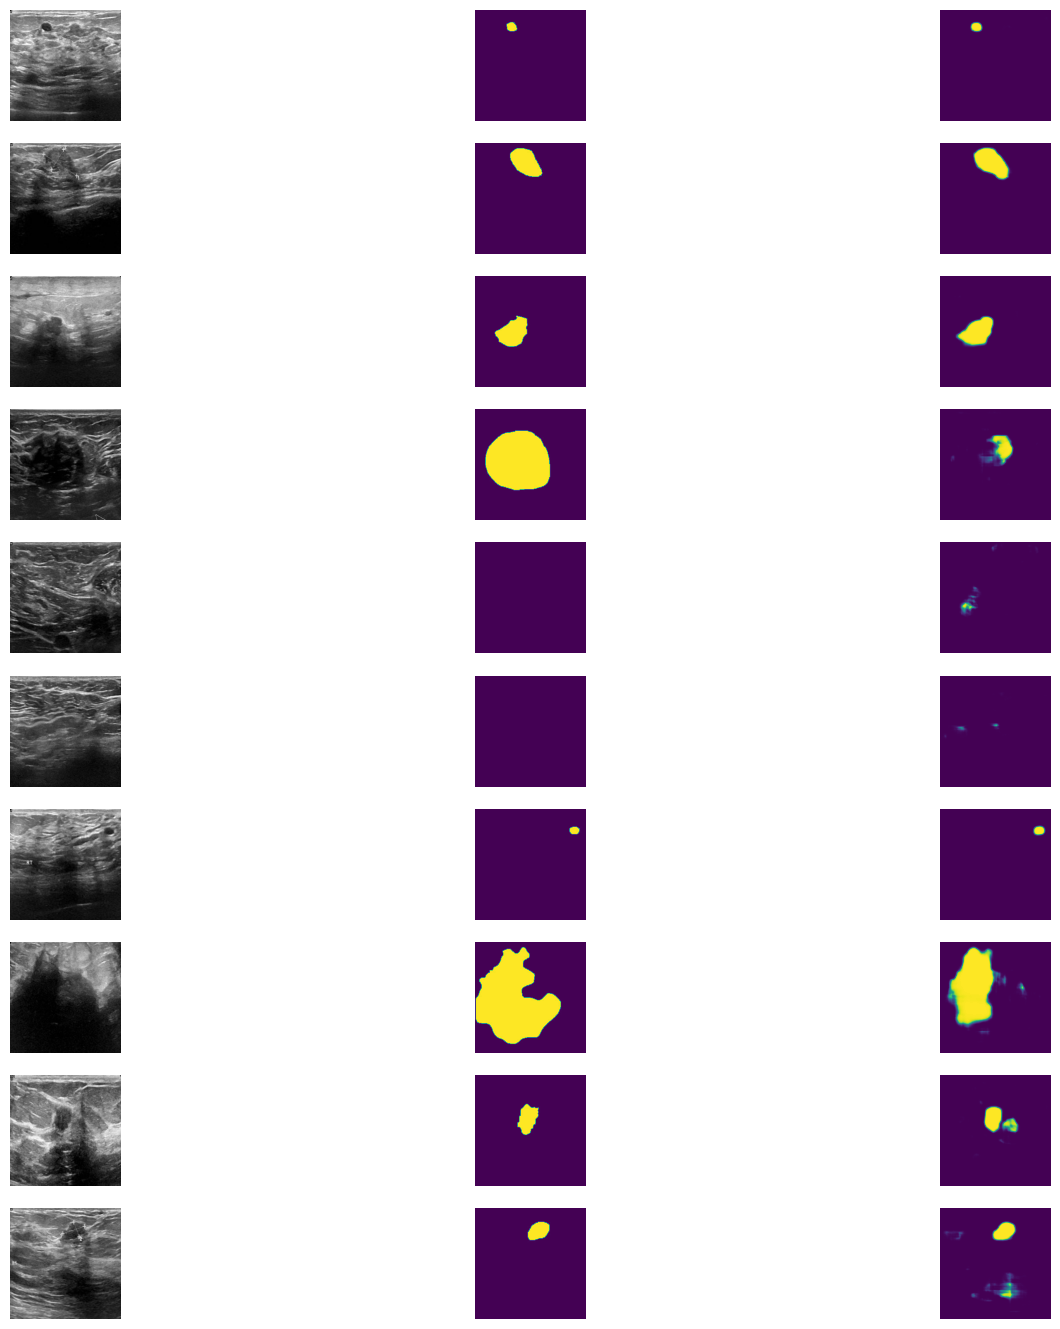

In [59]:
plot_sample(X_test,y_test,pred,0,10)

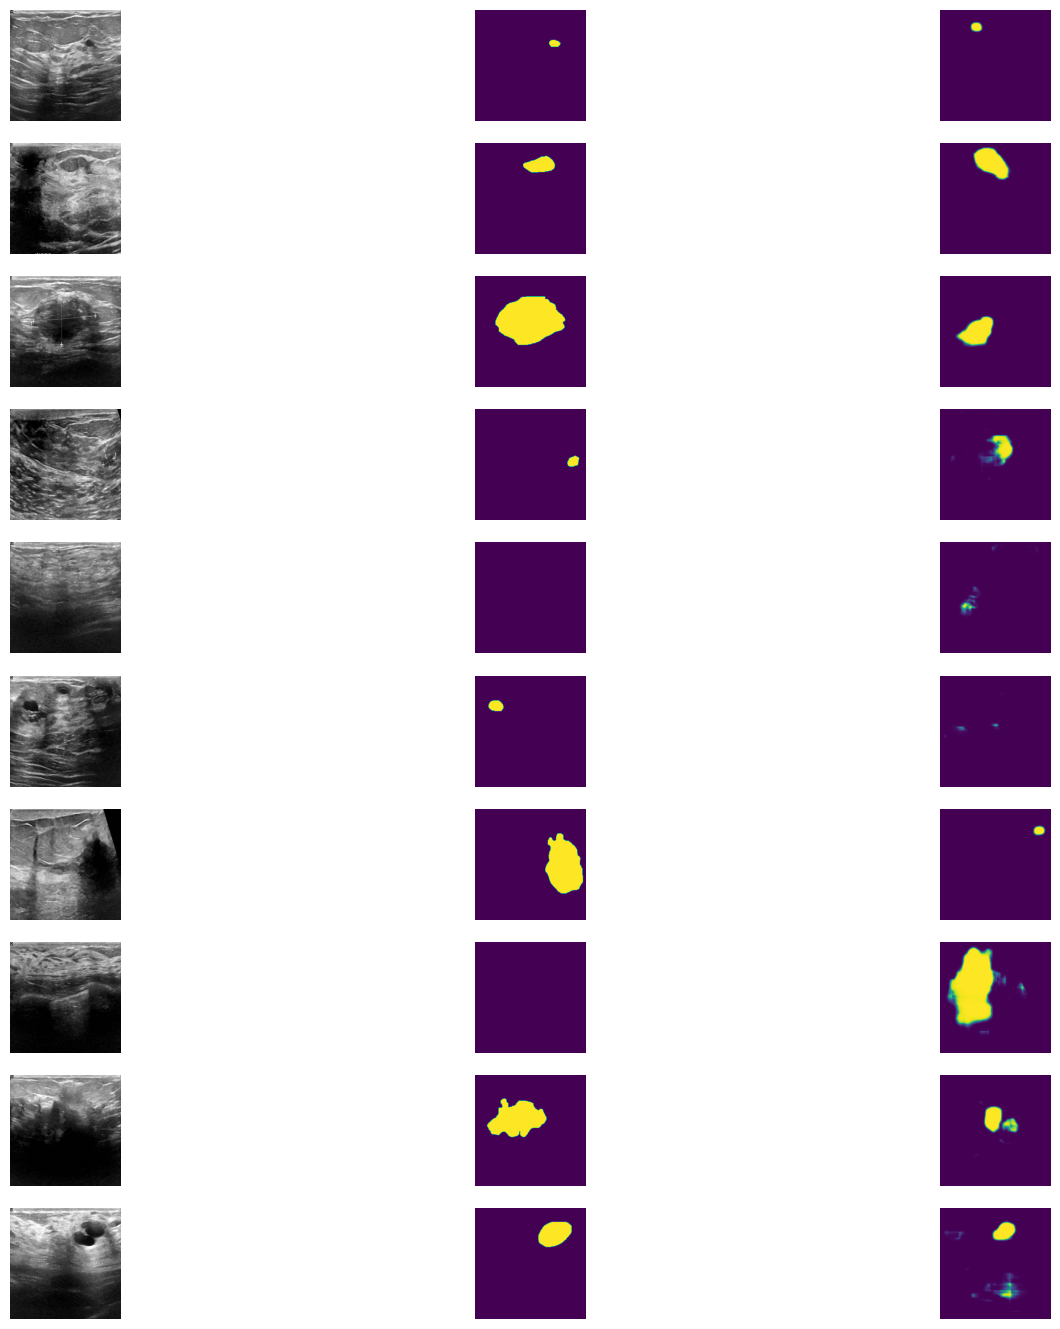

In [221]:
plot_sample(X_train,y_train,pred,0,10)

## Predict Benign Tumor :

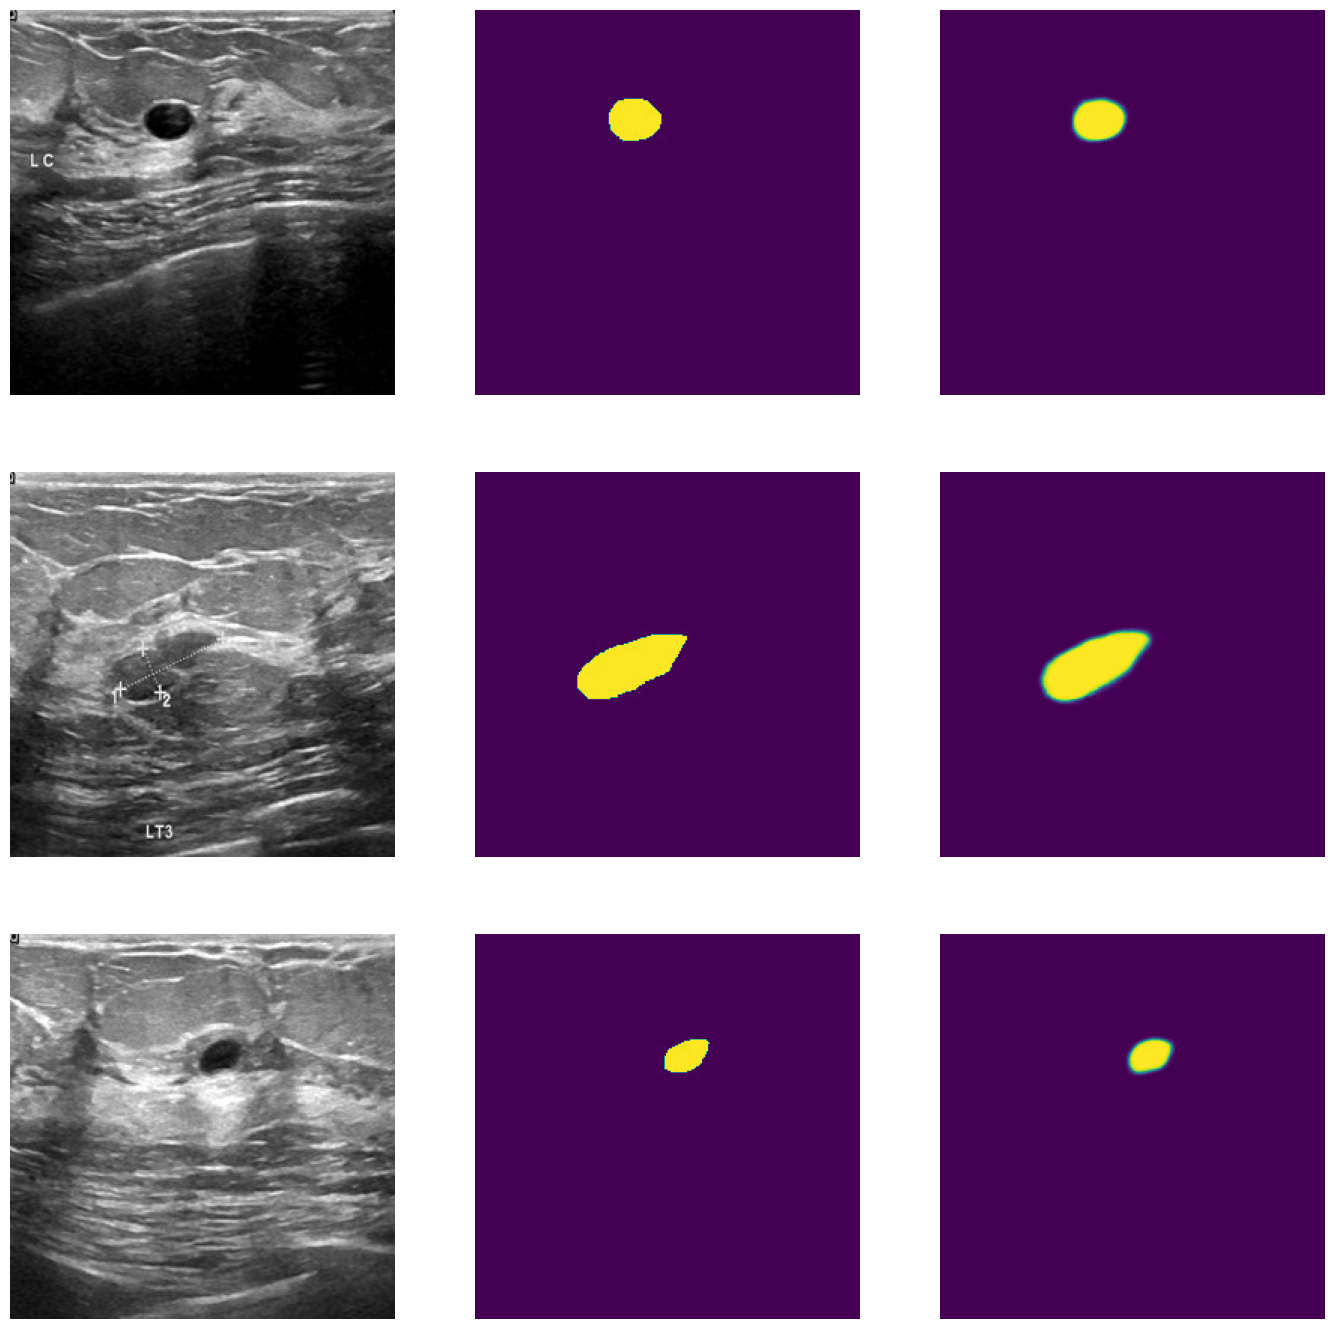

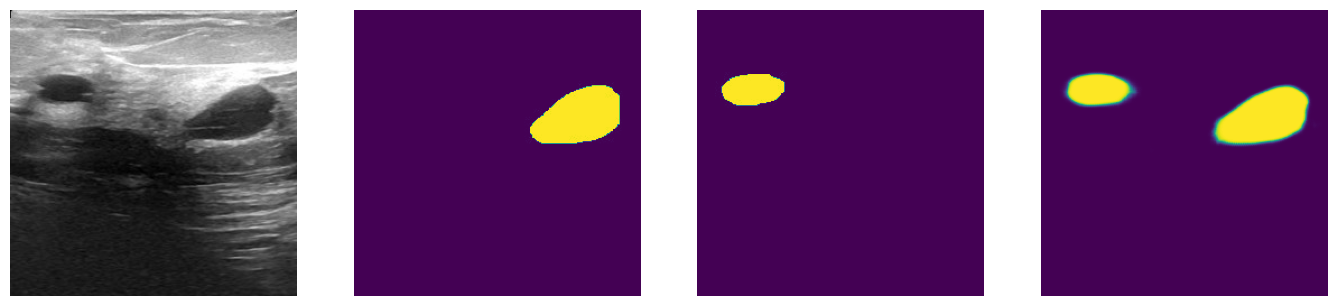

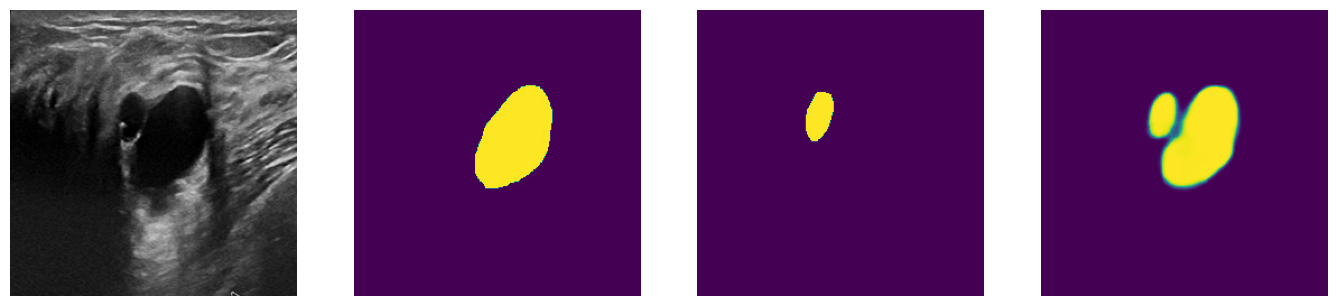

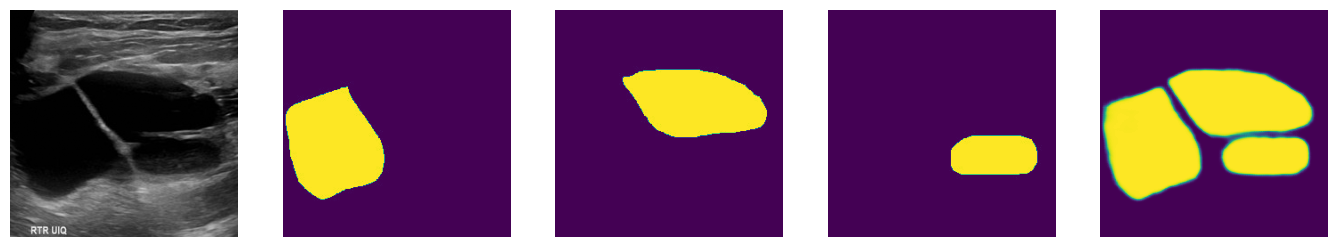

In [63]:
img1=plt.imread(directory+subdir[0]+'benign (208) resized.jpg')/255
imgm1=plt.imread(directory+subdir[0]+'benign (208)_mask resized_greyscale.jpg')/255
img2=plt.imread(directory+subdir[0]+'benign (226) resized.jpg')/255
imgm2=plt.imread(directory+subdir[0]+'benign (226)_mask resized_greyscale.jpg')/255
img3=plt.imread(directory+subdir[0]+'benign (21) resized.jpg')/255
imgm3=plt.imread(directory+subdir[0]+'benign (21)_mask resized_greyscale.jpg')/255

plot_sample([img1,img2,img3],[imgm1,imgm2,imgm3],model_best.predict(np.array([img1,img2,img3])),0,3)

img4=plt.imread(directory+subdir[0]+'benign (100) resized.jpg')/255
imgm4=plt.imread(directory+subdir[0]+'benign (100)_mask resized_greyscale.jpg')/255
imgm4_1=plt.imread(directory+subdir[0]+'benign (100)_mask_1 resized_greyscale.jpg')/255

plot_sample_single([img4,imgm4,imgm4_1])

img5=plt.imread(directory+subdir[0]+'benign (181) resized.jpg')/255
imgm5=plt.imread(directory+subdir[0]+'benign (181)_mask resized_greyscale.jpg')/255
imgm5_1=plt.imread(directory+subdir[0]+'benign (181)_mask_1 resized_greyscale.jpg')/255

plot_sample_single([img5,imgm5,imgm5_1])

img6=plt.imread(directory+subdir[0]+'benign (195) resized.jpg')/255
imgm6=plt.imread(directory+subdir[0]+'benign (195)_mask resized_greyscale.jpg')/255
imgm6_1=plt.imread(directory+subdir[0]+'benign (195)_mask_1 resized_greyscale.jpg')/255
imgm6_2=plt.imread(directory+subdir[0]+'benign (195)_mask_2 resized_greyscale.jpg')/255

plot_sample_single([img6,imgm6,imgm6_1,imgm6_2])

## Predict Malignant Tumor :

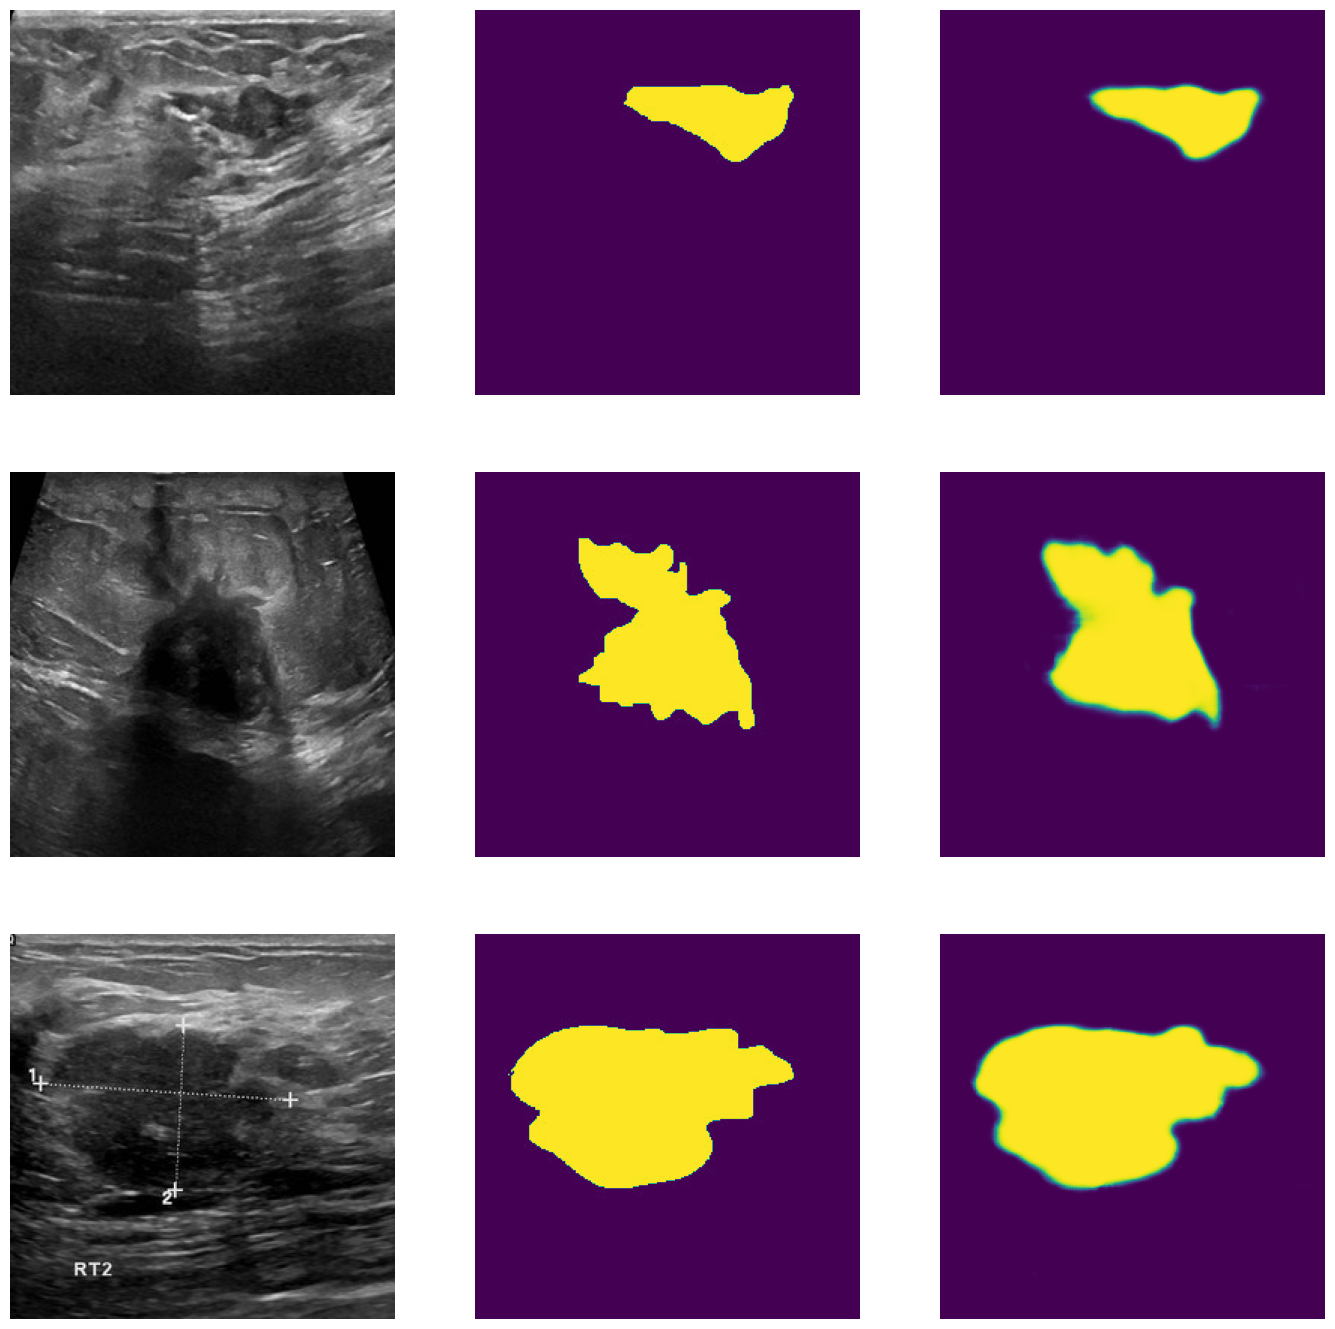

In [64]:
img1=plt.imread(directory+subdir[1]+'malignant (141) resized.jpg')/255
imgm1=plt.imread(directory+subdir[1]+'malignant (141)_mask resized_greyscale.jpg')/255

img2=plt.imread(directory+subdir[1]+'malignant (101) resized.jpg')/255
imgm2=plt.imread(directory+subdir[1]+'malignant (101)_mask resized_greyscale.jpg')/255

img3=plt.imread(directory+subdir[1]+'malignant (111) resized.jpg')/255
imgm3=plt.imread(directory+subdir[1]+'malignant (111)_mask resized_greyscale.jpg')/255

plot_sample([img1,img2,img3],[imgm1,imgm2,imgm3],model_best.predict(np.array([img1,img2,img3])),0,3)

## Predict Normal Ultrasound :

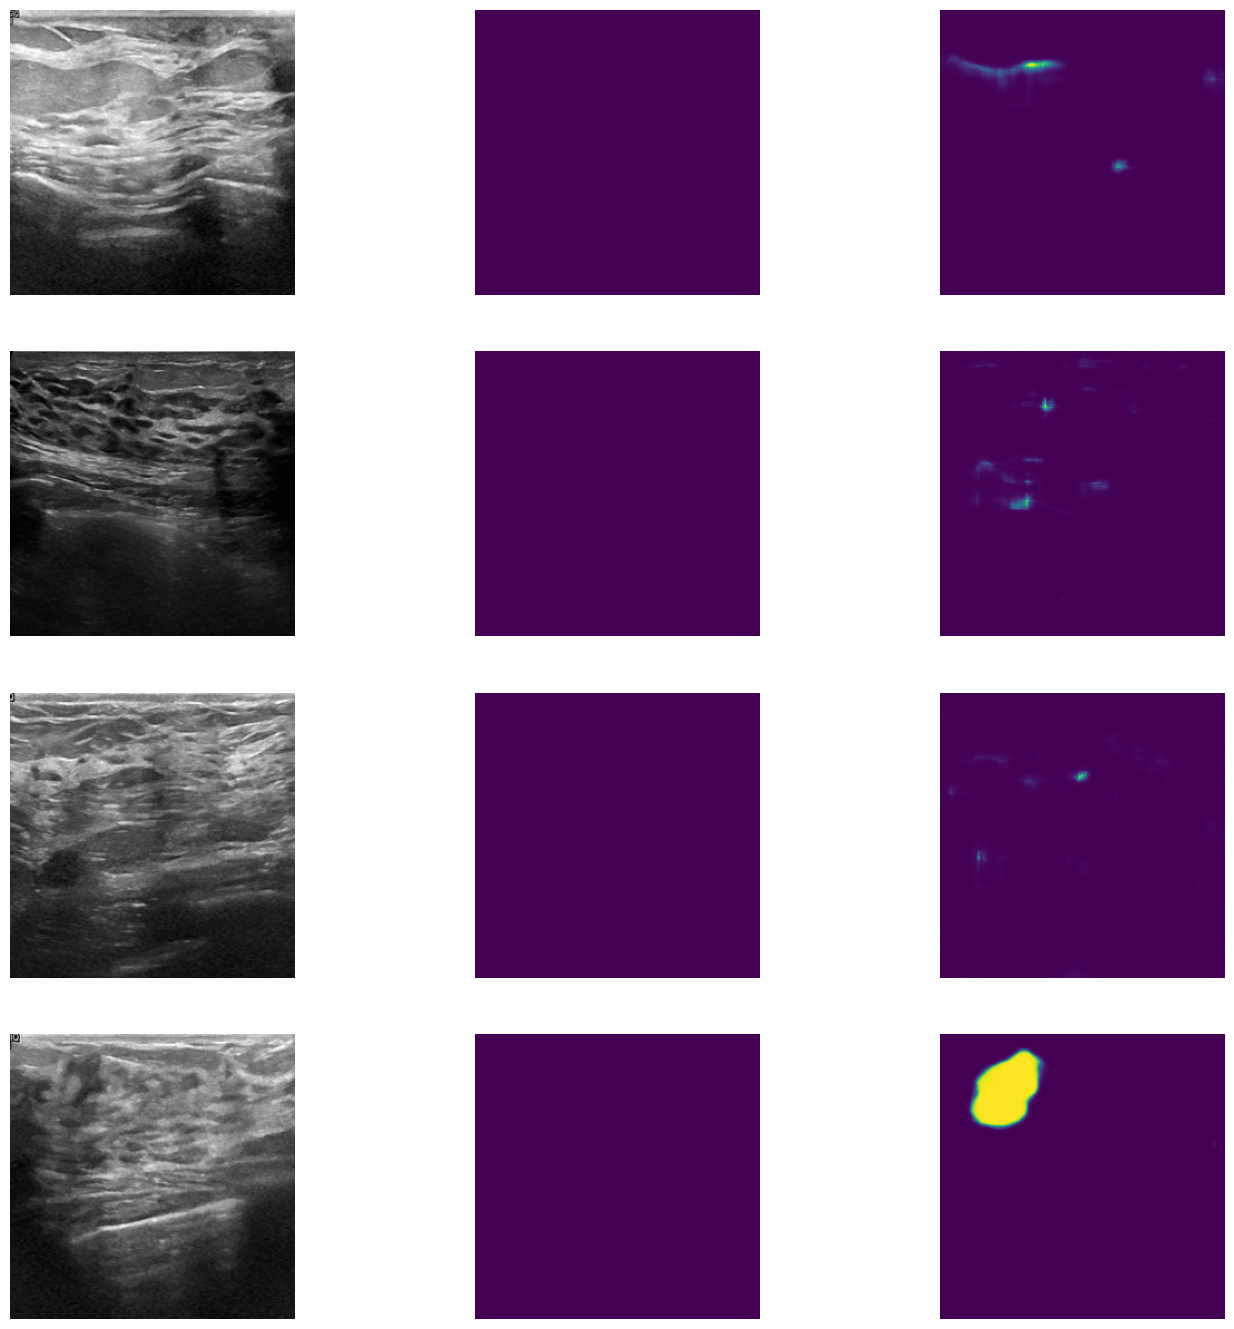

In [65]:
img1=plt.imread(directory+subdir[2]+'normal (102) resized.jpg')/255
imgm1=plt.imread(directory+subdir[2]+'normal (102)_mask resized_greyscale.jpg')/255

img2=plt.imread(directory+subdir[2]+'normal (123) resized.jpg')/255
imgm2=plt.imread(directory+subdir[2]+'normal (123)_mask resized_greyscale.jpg')/255

img3=plt.imread(directory+subdir[2]+'normal (99) resized.jpg')/255
imgm3=plt.imread(directory+subdir[2]+'normal (99)_mask resized_greyscale.jpg')/255

img4=plt.imread(directory+subdir[2]+'normal (1) resized.jpg')/255
imgm4=plt.imread(directory+subdir[2]+'normal (1)_mask resized_greyscale.jpg')/255

plot_sample([img1,img2,img3,img4],[imgm1,imgm2,imgm3,imgm4],model_best.predict(np.array([img1,img2,img3,img4])),0,4)

In [66]:
%run loss.ipynb

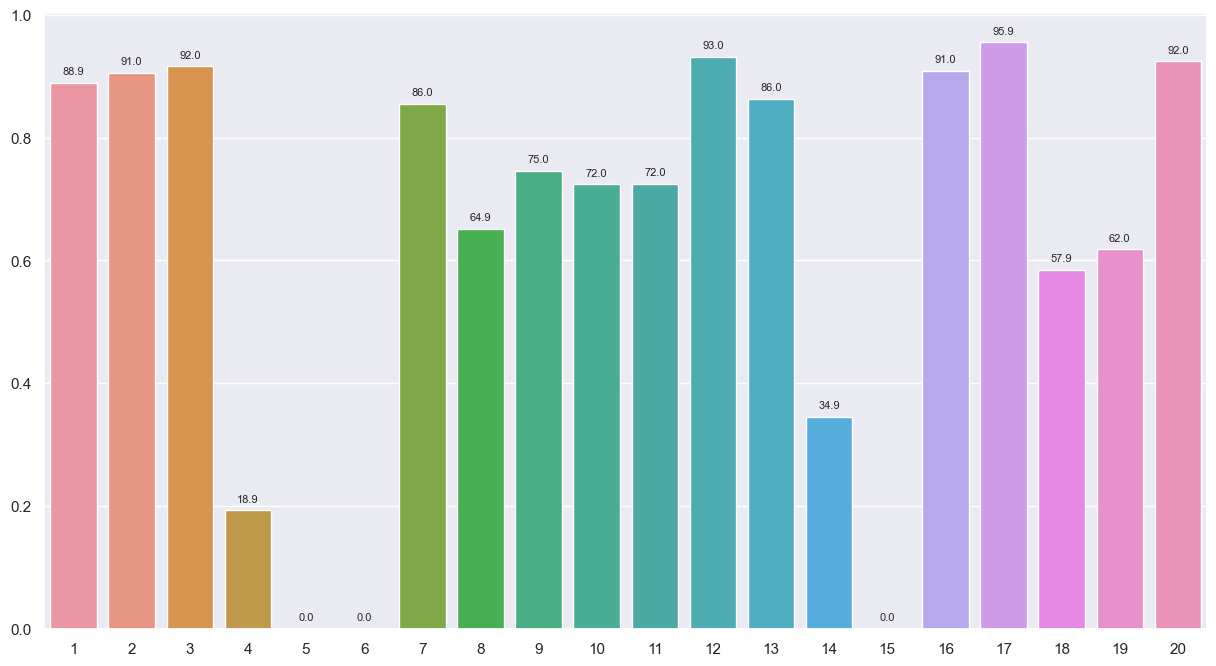

In [218]:
x=20
sns.set()
plt.figure(figsize=(15,8))
g=sns.barplot(x=[i for i in range(1,x+1)], y=[DiceAccuracy(pred[i], y_test[i], smooth=1e-6).numpy() for i in range(x)],)
for rect, label in zip(g.patches, [str(round(DiceAccuracy(pred[i], y_test[i], smooth=1e-6).numpy(),2)*100)[:4] for i in range(x)]):
    height = rect.get_height()
    g.text(rect.get_x() + rect.get_width() / 2, height+0.01, label, ha="center", va="bottom",fontsize=8)
plt.show()

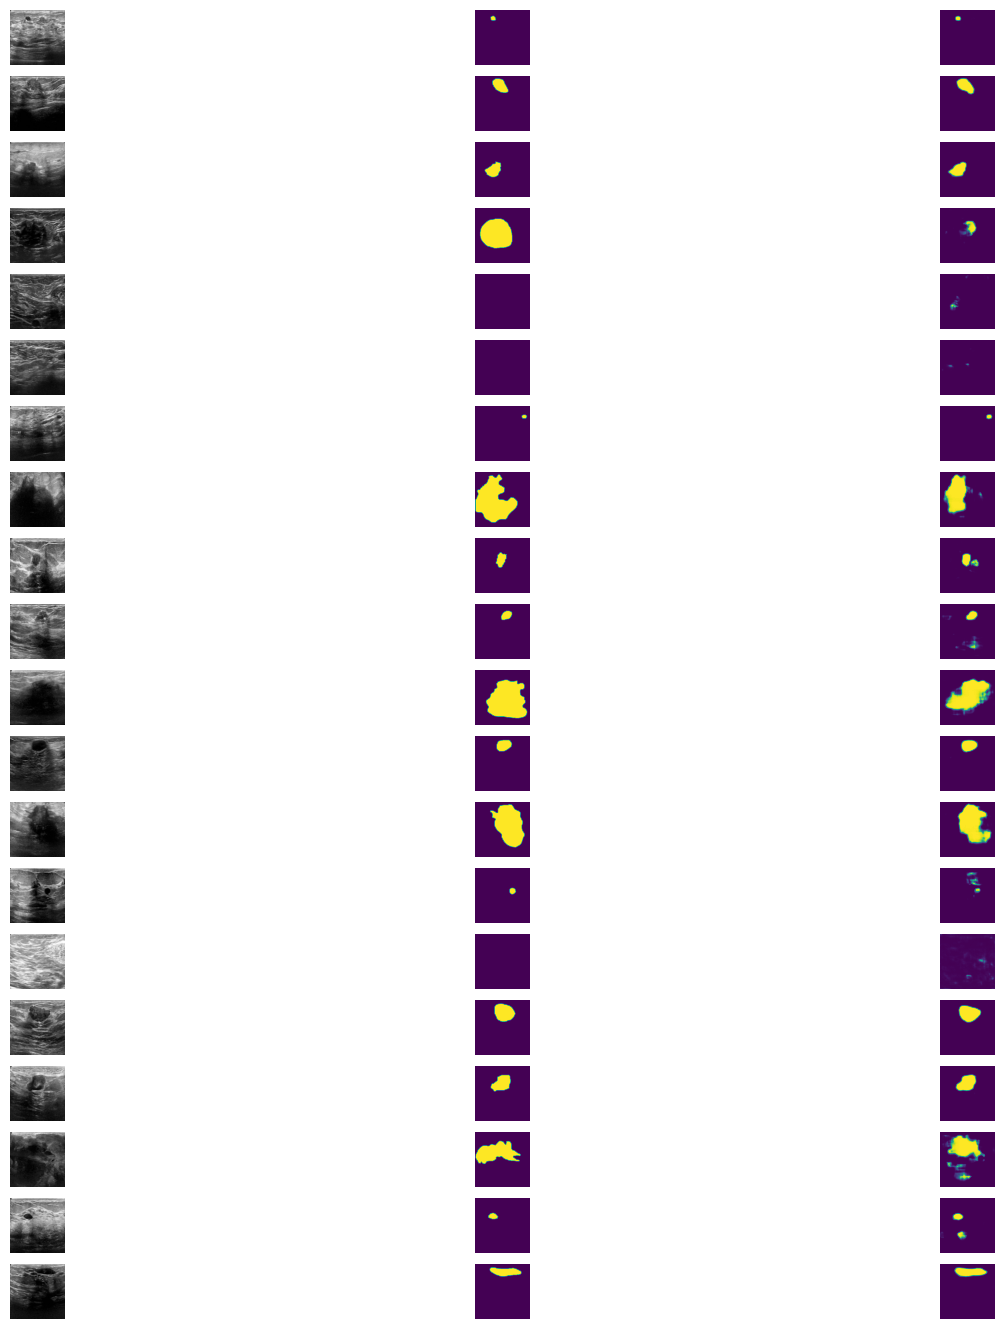

In [219]:
plot_sample(X_test,y_test,pred,0,20)